In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
matches = pd.read_csv('Data/WorldCupMatches.csv')
players = pd.read_csv('Data/WorldCupPlayers.csv')

In [3]:
matches.dropna(inplace=True)

In [4]:
matches.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA


# Primera consigna

In [ ]:
# Creo una columna al final del dataframe con el total de goles de cada partido
matches['Total Goals'] = matches['Home Team Goals'] + matches['Away Team Goals']

In [ ]:
# Selecciono la primera y última columna del dataframe
goals_by_matches = matches.iloc[:,[0, -1]]

In [ ]:
# Agrupo por año y calculo el promedio
avg_goals = goals_by_matches.groupby('Year').mean().rename(columns={'Total Goals':'Average Goals'})

##Lista ordenada de los mundiales por promedio de goles.

In [ ]:
avg_goals_sorted = avg_goals.sort_values(by=['Average Goals'], ascending=False)
avg_goals_sorted

,Average Goals
Year,
1954.0,5.384615
1938.0,4.666667
1934.0,4.117647
1950.0,4.000000
1930.0,3.888889
1958.0,3.600000
1970.0,2.968750
1982.0,2.807692
1962.0,2.781250


## Gráfico de barras del promedio de goles por mundial

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

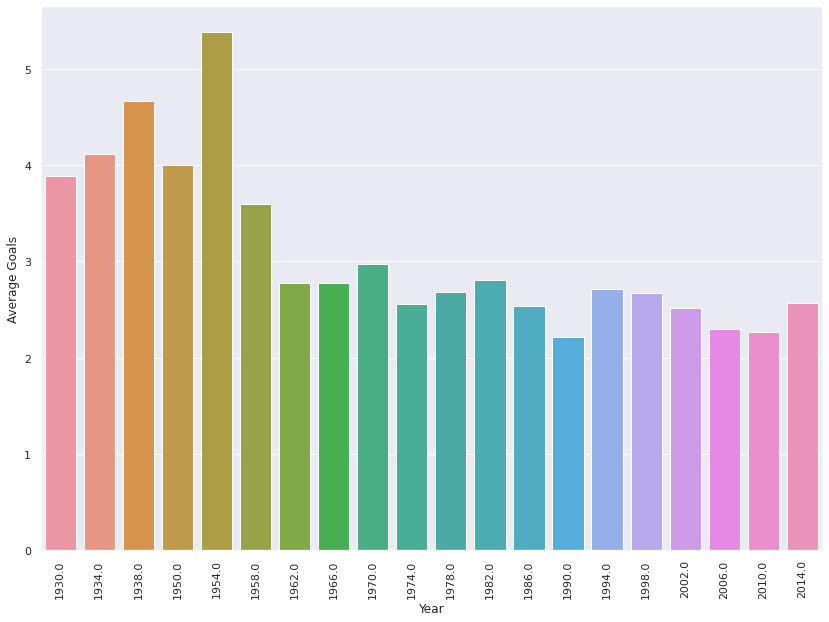

In [ ]:
sns.set(rc={'figure.figsize':(14,10)})
ax = sns.barplot(data = avg_goals, y='Average Goals', x=avg_goals.index)
plt.setp(ax.get_xticklabels(), rotation=90)

# Segunda Consigna

In [ ]:
# Me quedo sólo con los partidos cuya condición de victoria contiene la cadena penal,
# y luego selecciono sólo las columnas Year, Home Team Name, Away Team Name y Win conditions
matches_on_penalties = matches[matches['Win conditions'].str.contains('penal')].loc[:,['Home Team Initials', 'Away Team Initials', 'Win conditions', 'MatchID']]
matches_on_penalties.head()

,Home Team Initials,Away Team Initials,Win conditions,MatchID
357,FRG,FRA,win on penalties (5 - 4),914.0
404,BRA,FRA,France win on penalties (3 - 4),440.0
405,FRG,MEX,Germany FR win on penalties (4 - 1),575.0
406,ESP,BEL,Belgium win on penalties (4 - 5),421.0
452,IRL,ROU,Republic of Ireland win on penalties (5 - 4),248.0


## Países que ganaron por penalties

Al hacer un análisis rápido de los datos, veo que en win conditions tengo datos que no indican el país ganador. Como el resultado de la tanda de penalties está ordenadad de tal manera que el equipo de casa está a la izquiera, y el visitante a la derecha, puedo usar el resultado para determinar al ganador.

In [ ]:
def checkWinner(row):
  """Esta función sirve para determinar al ganador de la tanda de penalties"""
  a,b = row['Win conditions'].split('-') # divido el valor dado en Win conditions tomando como referencia el caracter -
  a = a[-2] # Me quedo sólo con el número a la izquierda de -
  b = b[1] # Me quedo sólo con el número a la derecha de -
  if a > b:
    return row['Home Team Initials']
  else:
    return row['Away Team Initials']

In [ ]:
# Aplico la función definida anteriormente sobre cada fila y su resultado lo guardo en una nueva columna que indica al ganador
matches_on_penalties['Winner'] = matches_on_penalties.apply(checkWinner, axis=1)
matches_on_penalties

,Home Team Initials,Away Team Initials,Win conditions,MatchID,Winner
357,FRG,FRA,win on penalties (5 - 4),914.0,FRG
404,BRA,FRA,France win on penalties (3 - 4),440.0,FRA
405,FRG,MEX,Germany FR win on penalties (4 - 1),575.0,FRG
406,ESP,BEL,Belgium win on penalties (4 - 5),421.0,BEL
452,IRL,ROU,Republic of Ireland win on penalties (5 - 4),248.0,IRL
456,YUG,ARG,win on penalties (2 - 3),31.0,ARG
460,ITA,ARG,win on penalties (3 - 4),28.0,ARG
461,FRG,ENG,win on penalties (4 - 3),159.0,FRG
507,MEX,BUL,Bulgaria win on penalties (1 - 3),3092.0,BUL
511,ROU,SWE,Sweden win on penalties (4 - 5),3095.0,SWE


In [ ]:
count = matches_on_penalties['Winner'].value_counts()
count

ARG    5
BRA    4
FRG    3
NED    2
FRA    2
CRC    2
SWE    1
BUL    1
ESP    1
IRL    1
UKR    1
GER    1
POR    1
ITA    1
PAR    1
URU    1
BEL    1
KOR    1
Name: Winner, dtype: int64

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

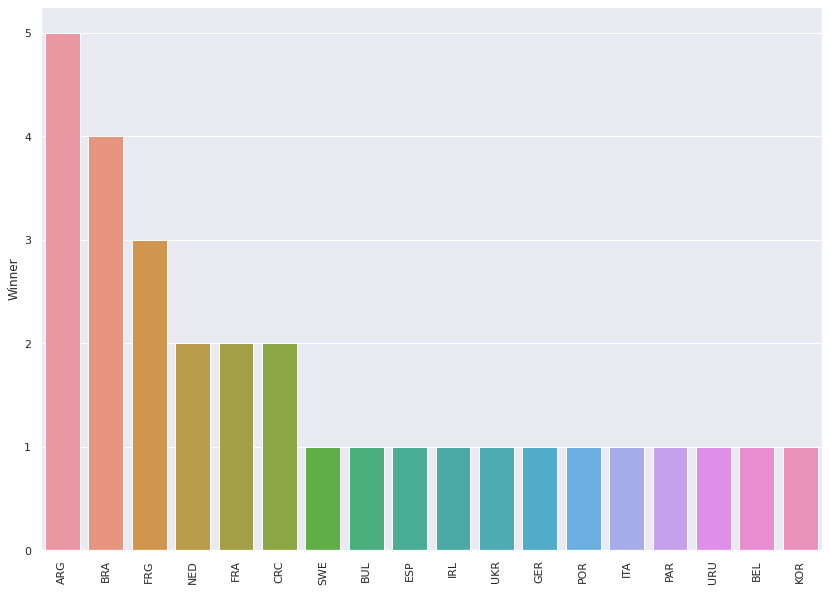

In [ ]:
sns.set(rc={'figure.figsize':(14,10)})
ax = sns.barplot(y = count, x=count.keys())
plt.setp(ax.get_xticklabels(), rotation=90)

## Arqueros que ganaron por penalties

In [ ]:
players_on_penalties = matches_on_penalties.merge(players, on='MatchID')

Asumiré que los arqueros que ganaron en penales son los mismos que iniciaron el encuentro, dada la baja probabilidad de que se los sustituya, y la ausencia de información sobre una posible sustitución.

In [ ]:
winner_gk = players_on_penalties[(players_on_penalties['Position'] == 'GK') & (players_on_penalties['Line-up'] == 'S') & (players_on_penalties['Winner'] == players_on_penalties['Team Initials'])]

In [ ]:
winner_gk['Player Name'].value_counts()

NAVAS K.             4
CILLESSEN            4
ROMERO               4
JULIO CESAR          4
TAFFAREL             2
Harald SCHUMACHER    2
Sergio GOYCOCHEA     2
Thomas RAVELLI       1
Bodo ILLGNER         1
Carlos ROA           1
Fabien BARTHEZ       1
Joel BATS            1
W J LEE              1
SHOVKOVSKYI          1
LEHMANN              1
RICARDO              1
BUFFON               1
MUSLERA              1
Pat BONNER           1
Jean Marie PFAFF     1
CASILLAS             1
Name: Player Name, dtype: int64

Como podemos ver en el resultado anterior, existen 4 arqueros que han ganado 4 veces por penales. Ellos son: Navas K., Cillessen, Romero, Julio Cesar.

# Tercera consigna

## Goles en la totalidad de los partidos

In [ ]:
# Uno los dataframes de partidos y jugadores
matches_goals = matches.loc[:,['Stage', 'MatchID']].merge(players.loc[:,['MatchID', 'Event']], on='MatchID')
matches_goals.dropna(inplace=True)
matches_goals

,Stage,MatchID,Event
2,Group 1,1096.0,G40'
3,Group 1,1096.0,G70'
6,Group 1,1096.0,G43' G87'
14,Group 1,1096.0,G19'
35,Group 4,1090.0,G45'
...,...,...,...
39054,Round of 16,300186497.0,I91' G105'
39056,Round of 16,300186497.0,I60'
39064,Round of 16,300186497.0,I111'
39065,Round of 16,300186497.0,I105' G107'


Como se puede apreciar en la columna de Event, estos son un sólo string, y junto al minuto tienen marcado una letra, por lo que habría que separar los valores individuales de cada evento y eliminar la letra que acompaña al tiempo.

In [ ]:
def checkEvent(data):
  """Esta función busca los eventos que representan goles"""
  if not('MP' in data) and ('G' in data or 'P' in data or 'W' in data):
    return True
  return False

In [ ]:
def minuteGoal(row):
  """Esta función sirve para separar los eventos en datos individuales de un array y dejar sólo el número"""
  if checkEvent(row['Event']):
    event_list = row['Event'].replace('\'','').split(' ')
    goals_list = [x.replace(' ','')[1:] for x in event_list if checkEvent(x)]
    return goals_list

In [ ]:
def goals90(n):
  """Esta función elimina todos los goles en tiempo suplementario"""
  return [int(x) for x in n if int(x) <= 90]

In [ ]:
matches_goals['Goals'] = matches_goals.apply(minuteGoal, axis=1)
matches_goals.dropna(inplace=True)

In [ ]:
matches_goals['Goals'] = matches_goals['Goals'].apply(goals90)

Una vez que tengo separado todo, debo juntar todos los minutos en un array para preparar el histograma. Como la suma de arrays es una concatenación de arrays, aprovecho eso para agrupar los partidos y sumarlos entre sí.

In [ ]:
goals = matches_goals.loc[:,['MatchID', 'Goals']].groupby('MatchID').sum().sum()

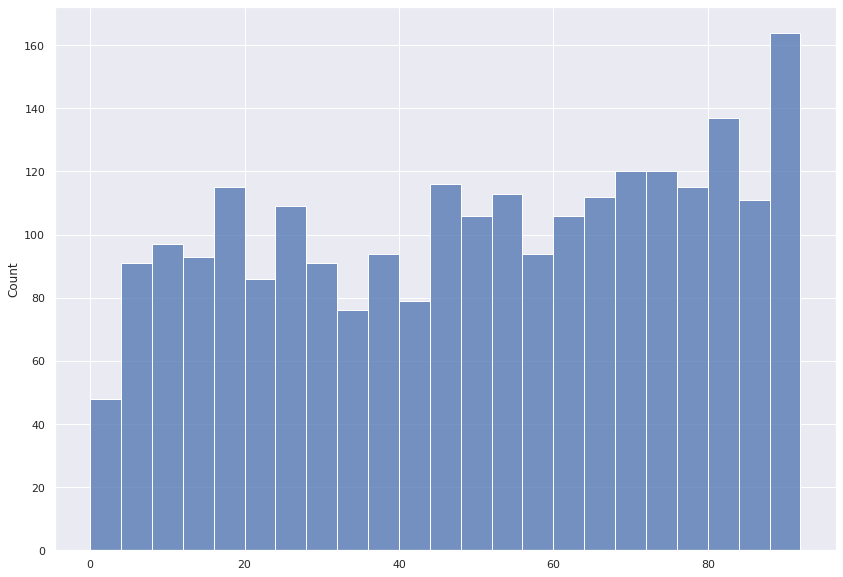

In [ ]:
x_range = np.linspace(0,90, 91)
sns.histplot(x=goals[0], binwidth=4, binrange=(0,90))

## Goles por instancias

### Fase de grupos

In [ ]:
matches_goals_group = matches_goals[matches_goals['Stage'].str.contains('Group')]

In [ ]:
goals_group = matches_goals_group.loc[:,['MatchID', 'Goals']].groupby('MatchID').sum().sum()

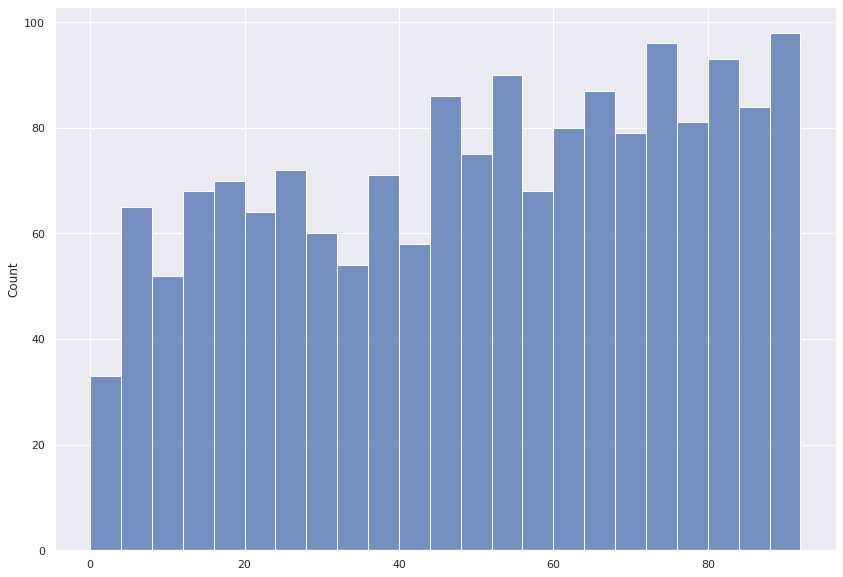

In [ ]:
x_range = np.linspace(0,90, 91)
sns.histplot(x=goals_group[0], binwidth=4, binrange=(0,90))

## Fase eliminatoria

In [ ]:
matches_goals_knockout = matches_goals[~(matches_goals['Stage'].str.contains('Group'))]

In [ ]:
goals_knockout = matches_goals_knockout.loc[:,['MatchID', 'Goals']].groupby('MatchID').sum().sum()

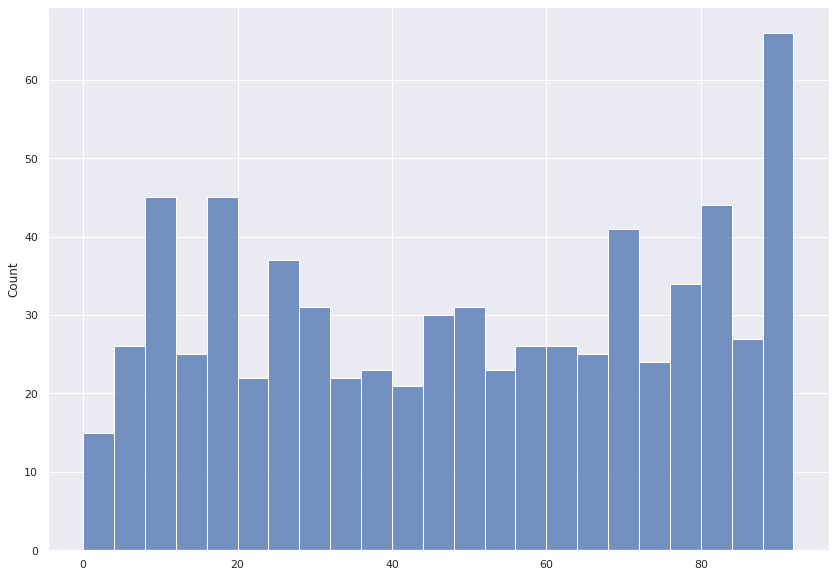

In [ ]:
x_range = np.linspace(0,90, 91)
sns.histplot(x=goals_knockout[0], binwidth=4, binrange=(0,90))

# Cuarta consigna

##Tiempo al primer gol

In [ ]:
def firstGoal(val):
  val.sort()
  if len(val)>0:
    return val[0]

In [ ]:
matches_goals['First Goal'] = matches_goals['Goals'].apply(firstGoal)
matches_goals

,Stage,MatchID,Event,Goals,First Goal
2,Group 1,1096.0,G40',[40],40.0
3,Group 1,1096.0,G70',[70],70.0
6,Group 1,1096.0,G43' G87',"[43, 87]",43.0
14,Group 1,1096.0,G19',[19],19.0
35,Group 4,1090.0,G45',[45],45.0
...,...,...,...,...,...
39008,Round of 16,300186497.0,I91' G105',[],NaN
39019,Round of 16,300186497.0,I105' G107',[],NaN
39036,Round of 16,300186497.0,G93',[],NaN
39054,Round of 16,300186497.0,I91' G105',[],NaN


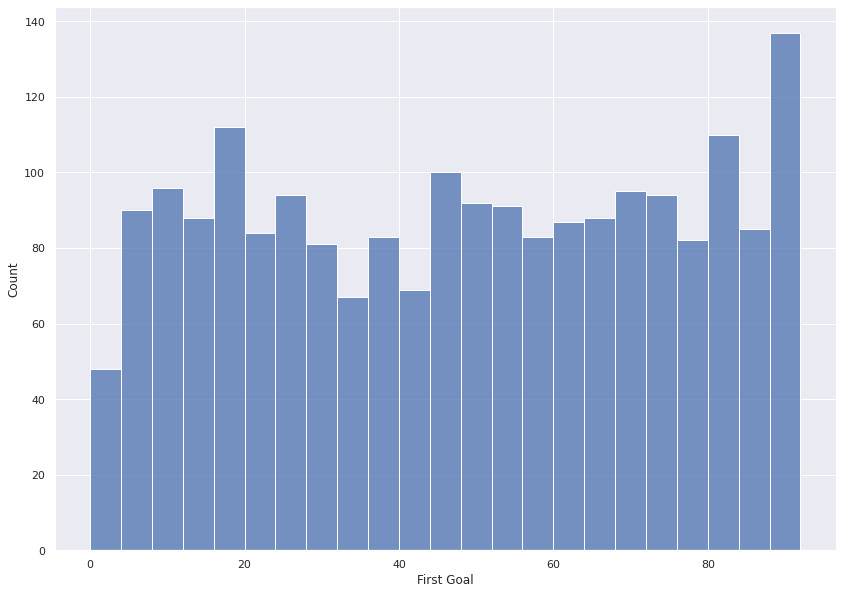

In [ ]:
sns.histplot(data=matches_goals, x='First Goal', binwidth=4, binrange=(0,90))

##Tiempo entre goles

In [ ]:
def deltaGoals(val):
  if len(val) > 1:
    i = 1
    deltas = []
    while i < len(val):
      deltas.append(val[i]-val[i-1])
      i += 1
    return deltas

In [ ]:
matches_goals['Deltas'] = matches_goals['Goals'].apply(deltaGoals)
matches_delta = matches_goals.dropna()

In [ ]:
deltas = matches_delta['Deltas'].sum()

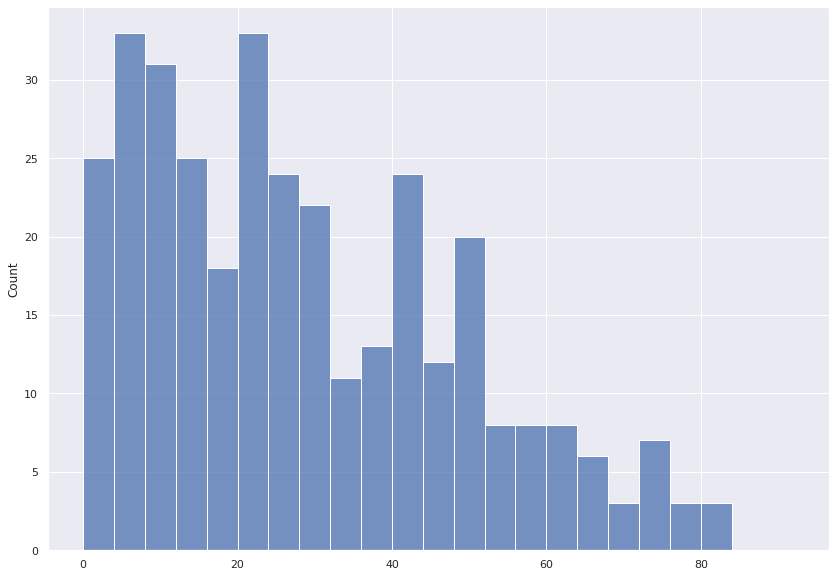

In [ ]:
sns.histplot(x=deltas, binwidth=4, binrange=(0,90))